# Laboratório 6
Material desenvolvido por Henrique Margotte e Aurora Pozo para a disciplina de Aprendizado de Máquina, para o curso de Informática Biomédica da UFPR, semestre 2025/2. Códigos baseados em exemplos da biblioteca scikit-learn e nos notebooks Python do livro "Inteligência Artificial: Uma Abordagem de Aprendizado de Máquina", 2ª edição.

# Exemplo 1: AutoEncoders
No laboratório de hoje, veremos uma técnica diferente de Aprendizado de Máquina, os AutoCodificadores, ou AutoEncoders (AE). Os AEs são considerados como um método de aprendizado auto-supervisionado (ou _self supervised learning_), em que o próprio modelo define as "classes", para funcionar de modo semelhante ao aprendizado supervisionado. O AE funciona de modo que a entrada e saída esperada do modelo são iguais, ou seja, o modelo vai apenas aprender como copiar a entrada para a saída! Dessa forma, não precisamos rotular os dados, mas temos o objetivo de cada entrada bem definido! Os Grandes Modelos de Linguagem (LLMs) também se encaixam nesse método de aprendizado, sendo treinados com as palavras anteriores tentando prever a próxima palavra dentro de um mesmo texto.

Mas... isso não seria apenas copiar a entrada para a saída? Só fazendo os neurônios replicarem a entrada sem a alterarem? Sim, _seria_. A diferença é que os AEs possuem uma estrutura própria, dividida em duas partes:
- Codificador (*Encoder*): Conjunto de camadas que recebe os dados de entrada e processá-os, os "codificando" para um vetor de tamanho menor do que a entrada, chamado de Vetor Latente (*Feature Vector*), que é gerado como saída do Codificador.
- Decodificador (*Decoder*): Conjunto de camadas que recebe o Vetor Latente como entrada e o transforma na saída esperada.

## Exemplo 1.1: AutoEncoders com scikit-learn
Vamos ver um exemplo da aplicação de um AE no scikit-learn. Podemos fazer isso utilizando um `MLPRegressor`, definindo o tamanho das camadas no formado codificador-decodificador. O modelo de regressão é mais apropriado pois queremos minimizar o erro, ou diferença, entre a entrada e a saída.

Como exemplo, utilizremos imagens de gatos e cachorros da base de dados `CIFAR-10`, integrada ao Keras.

In [4]:
import os
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=url, extract=False)
extract_path = os.path.splitext(path_to_zip)[0]

# Extract only once
if not os.path.exists(extract_path):
    with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Paths to the small filtered dataset
train_dir = os.path.join(extract_path, "cats_and_dogs_filtered/train")
validation_dir = os.path.join(extract_path, "cats_and_dogs_filtered/validation")

# Load a small subset for quick use
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(64, 64),
    batch_size=32,
    shuffle=True,
    seed=42
)

# Normalize images
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
Found 2000 files belonging to 2 classes.


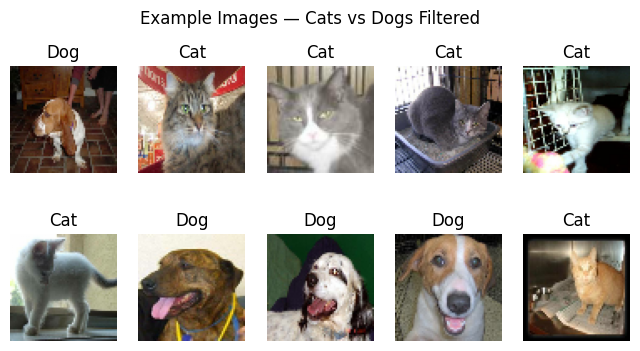

In [5]:
plt.figure(figsize=(8, 4))
for images, labels in train_ds.take(1):
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title("Cat" if labels[i].numpy() == 0 else "Dog")
        plt.axis("off")
plt.suptitle("Example Images — Cats vs Dogs Filtered")
plt.show()
